In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow.keras.utils as ku
import tensorflow as tf
import numpy as np

In [51]:
tokenizer = Tokenizer()

data = open('texts/fellowship2-smaller.txt').read()

data = data.replace(',', 'pausesentence')
data = data.replace('!', 'exclamationmark')
data = data.replace('?', '.')

corpus = data.lower().split(". ")

for i in range(len(corpus)):
    corpus [i] =  corpus [i] + 'endofthesentence'

tokenizer.fit_on_texts(corpus)

infrequent_words = []
for word in list(tokenizer.word_counts):
    if tokenizer.word_counts[word]<5:
        infrequent_words.append(word)

#remove infrequent words from the tokenizer
corpus_for_words = list(corpus)
for i in range(len(corpus)):
    for word in infrequent_words:
        corpus_for_words[i] = corpus_for_words[i].replace(' '+word+' ', ' ')
  
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus_for_words)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

KeyboardInterrupt: 

In [45]:
len(corpus), total_words

(379, 702)

In [46]:
#tokenizer.word_counts

In [47]:
model = Sequential()

model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20, return_sequences=True)))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(40, activation='relu'))
model.add(Dense(total_words, activation='softmax'))
    
model.compile(loss='categorical_crossentropy', optimizer=tf.train.AdamOptimizer(), metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 61, 64)            44928     
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 61, 40)            13600     
_________________________________________________________________
dropout_7 (Dropout)          (None, 61, 40)            0         
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 40)                9760      
_________________________________________________________________
dense_12 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_13 (Dense)             (None, 702)               28782     
Total params: 98,710
Trainable params: 98,710
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
5382/5382 [==============================] - 50s 9ms/step - loss: 5.6244 - acc: 0.0912
Epoch 2/100
5382/5382 [==============================] - 38s 7ms/step - loss: 5.2377 - acc: 0.0977
Epoch 3/100
5382/5382 [==============================] - 35s 7ms/step - loss: 5.2082 - acc: 0.0977
Epoch 4/100
5382/5382 [==============================] - 34s 6ms/step - loss: 5.1696 - acc: 0.1009
Epoch 5/100
5382/5382 [==============================] - 35s 6ms/step - loss: 5.1183 - acc: 0.1070
Epoch 6/100
5382/5382 [==============================] - 42s 8ms/step - loss: 5.0600 - acc: 0.1094
Epoch 7/100
5382/5382 [==============================] - 44s 8ms/step - loss: 5.0158 - acc: 0.1130
Epoch 8/100
5382/5382 [==============================] - 45s 8ms/step - loss: 4.9786 - acc: 0.1145
Epoch 9/100
5382/5382 [==============================] - 38s 7ms/step - loss: 4.9519 - acc: 0.1156
Epoch 10/100
5382/5382 [==============================] - 37s 7ms/step - loss: 4.9218 - acc: 0.1161
Epoch 11/

5382/5382 [==============================] - 25s 5ms/step - loss: 3.4390 - acc: 0.2170
Epoch 84/100
5382/5382 [==============================] - 25s 5ms/step - loss: 3.4470 - acc: 0.2107
Epoch 85/100
5382/5382 [==============================] - 25s 5ms/step - loss: 3.4170 - acc: 0.2179
Epoch 86/100
5382/5382 [==============================] - 25s 5ms/step - loss: 3.4168 - acc: 0.2148
Epoch 87/100
5382/5382 [==============================] - 25s 5ms/step - loss: 3.3802 - acc: 0.2187
Epoch 88/100
5382/5382 [==============================] - 24s 4ms/step - loss: 3.3584 - acc: 0.2178
Epoch 89/100
5382/5382 [==============================] - 24s 4ms/step - loss: 3.3460 - acc: 0.2215
Epoch 90/100
5382/5382 [==============================] - 24s 4ms/step - loss: 3.3338 - acc: 0.2246
Epoch 91/100
5382/5382 [==============================] - 25s 5ms/step - loss: 3.3578 - acc: 0.2198
Epoch 92/100
5382/5382 [==============================] - 25s 5ms/step - loss: 3.2959 - acc: 0.2252
Epoch 93/100


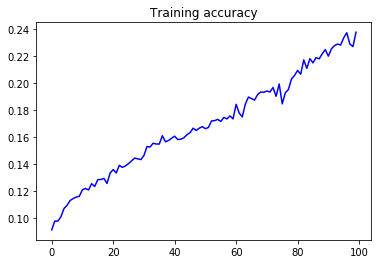

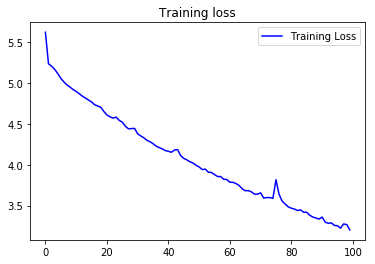

In [49]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [50]:
seed_text = "It will have to be paid for"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

It will have to be paid for lostendofthesentence and the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of
